In [55]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [4]:
# dataset 1 is job listings

In [43]:
job_listings = pd.read_csv('Datasets/job_listings.csv', dtype={"title":str, "company_name":str, "city":str, "region":str, "zip":str, "created":str, "last_checked":str, "last_updated":str, "delete_date":str, "onet_occupation_code":str, "SOC_occupation_code":str, "url":str, "stock_exchange_country":str, "stock_exchange_name":str, "stock_ticker":str, "ticker_end_date":str, "ticker_start_date":str})
job_listings["created"] = job_listings.created.apply(lambda x: datetime.fromisoformat(x))
job_listings["delete_date"] = job_listings.delete_date.apply(lambda x: datetime.fromisoformat(x))

In [6]:
# not using this
onet_code_legend = pd.read_csv('Datasets/Code Legends/onet_code_legend.csv')

In [7]:
soc_code_legend = pd.read_csv('Datasets/Code Legends/soc_code_legend.csv')

In [114]:
job_listings["created_year"] = [x.year for x in job_listings.created]
job_listings["created_month"] = [x.month for x in job_listings.created]
job_listings["deleted_year"] = [x.year for x in job_listings.delete_date]
job_listings["deleted_month"] = [x.month for x in job_listings.delete_date]

In [257]:
jobcountsList = []
datesList = []
datesList2 = []
monthmap = {"1":"Jan", "2":"Feb", "3":"Mar", "4":"Apr", "5":"May", "6":"Jun", "7":"Jul", "8":"Aug", "9":"Sep", "10":"Oct", "11":"Nov", "12":"Dec"}
years = []
for year in range (2011, 2020, 1):
    years.append(year)
    jobcounts = []
    dates = []   
    dates2 = [] 
    for month in range(1,13,1):
        # this = job_listings[job_listings.created.apply(lambda x:  x.year <= year and  x.month <= month) & job_listings.delete_date.apply(lambda x:  x.year >= year and  x.month >= month)]
        this = job_listings

        this = this[this.created_year <= year]
        this = this[this.created_month <= month]
        this = this[this.deleted_year >= year]
        this = this[this.deleted_month >= month]
        # job_listings.deleted_year >= year & job_listings.deleted_month >= month]
        jobcounts.append(this["title"].count())
        dates2.append("{} {}".format(monthmap[str(month)],"'"+str(year).lstrip("20")))
        dates.append("{}".format(monthmap[str(month)]))
    jobcountsList.append(jobcounts)
    datesList.append(dates)
    datesList2.append(dates2)    




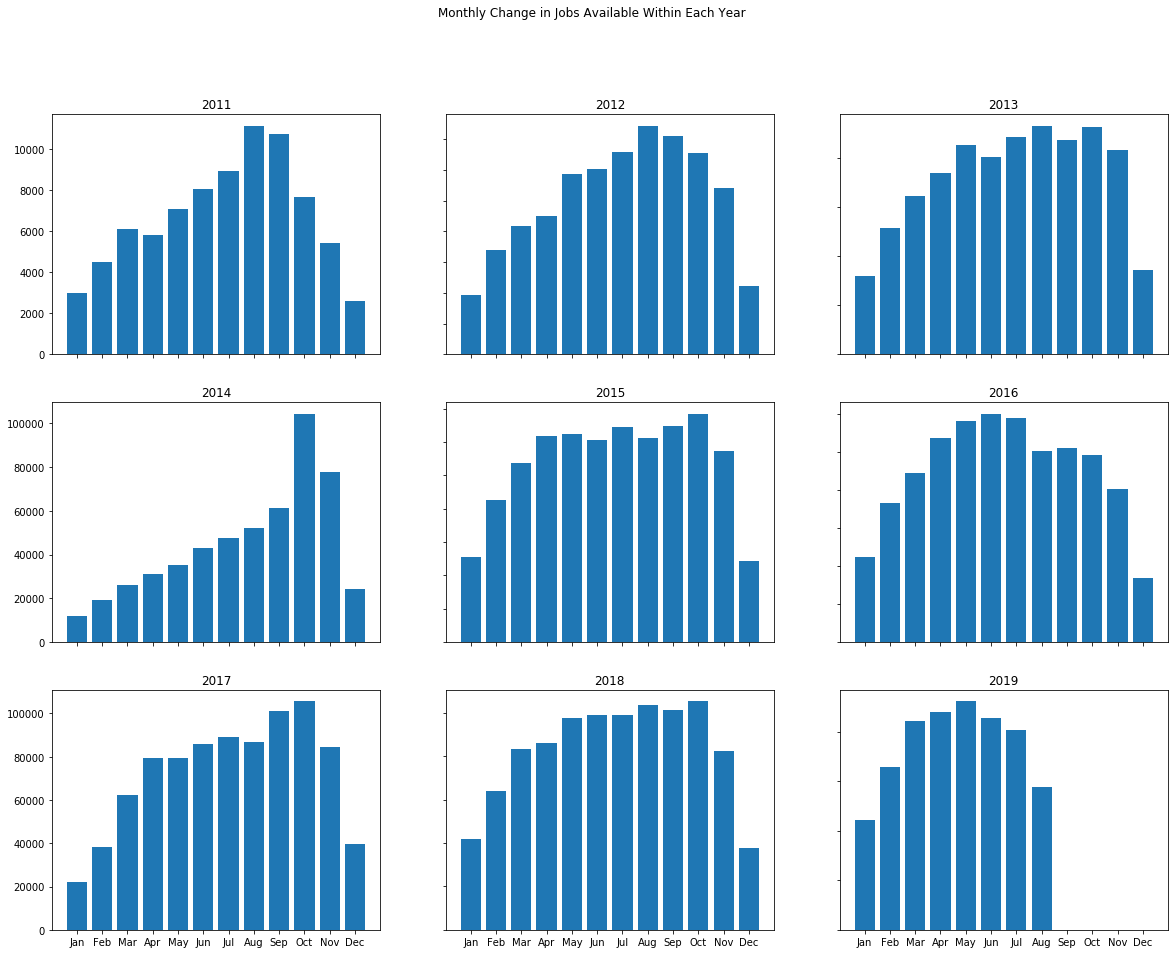

In [259]:
#plot by year
# plt.figure(figsize=(20,10))
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20,15))
fig.suptitle('Monthly Change in Jobs Available Within Each Year')
for ax,dates, jobcounts, year in zip(axs.flat, datesList, jobcountsList, years):
    ax.bar(dates,jobcounts)
    ax.set_title(str(year))

for ax in axs.flat:
    ax.label_outer()
            

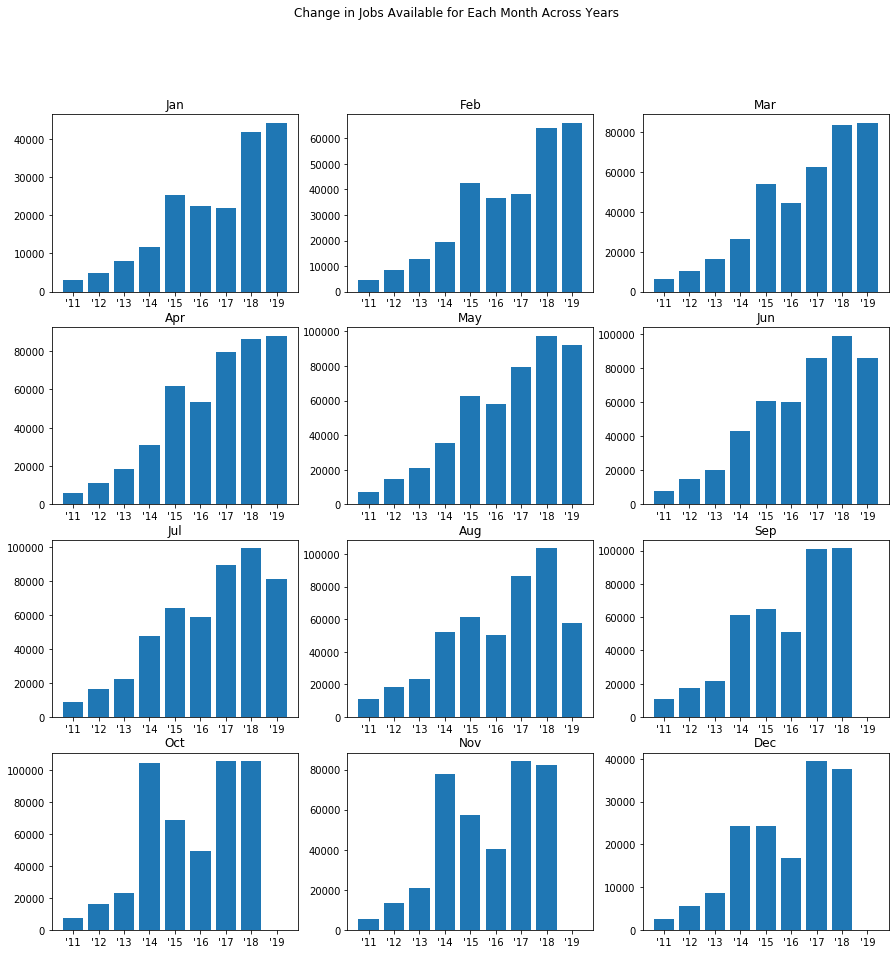

In [260]:
#plot by month
# plt.figure(figsize=(20,10))
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15,15))
fig.suptitle('Change in Jobs Available for Each Month Across Years')

datesListnp = np.array(datesList2)

# datesListnp = np.array(map(lambda x : x.split()[1], datesListnp))
jobcountsListnp = np.array(jobcountsList)
# for i, year in enumerate(years):

for ax,dates, jobcounts in zip(axs.flat, datesListnp.T, jobcountsListnp.T):
    newdates = [date.split()[1] for date in dates]
    mth = dates[0].split()[0]
    ax.bar(newdates,jobcounts)
    ax.set_title(str(mth))

# for ax in axs.flat:
#     ax.label_outer()

In [204]:
job_listings["place"] = jobs_listings["city"] + ", " + job_listings["region"]
job_listings_place = job_listings.dropna(subset=["place"])
# between 2011 to 2020 only
job_listings_place

In [216]:
# filter for our timeframe
job_listings_place = job_listings_place[job_listings_place.created_year >= 2011]

In [229]:
top6 = job_listings_place.groupby("place").count().reset_index().sort_values("title", ascending=False).head(6)["place"].values.tolist()
job_listings_place_top6 = job_listings_place[job_listings_place.place.isin(top6)]

In [250]:
job_listings_place_top6.groupby(["place","created_year"]).count()

3249   
                    2015                 4126                  4126   
                    2016                 3290                  3290   
                    2017                 5258                  5258   
                    2018                 6396                  6396   
                    2019                 4357                  4357   
London, England     2011                 8247                  8247   
                    2012                12513                 12513   
                    2013                21832                 21832   
                    2014                40970                 40970   
                    2015                45919                 45919   
                    2016                42850                 42850   
                    2017                83464                 83464   
                    2018                91738                 91738   
                    2019                50711                 50711   
Manchester, England 2011                  647                   647   
                    2012                 1745                  1745   
                    2013                 1640                  1640   
                    2014                 3669                  3669   
                    2015                 4368                  4368   
                    2016                 3957                  3957   
                    2017                 6850                  6850   
                    2018                 8413                  8413   
                    2019                 5980                  5980   
Oakdale, Wales      2014                    1                     1   
                    2016                  345                   345   
                    2017                17450                 17450   
                    2018                19238                 19238   
                    2019                11927                 11927   

                                  SOC_occupation_code    url  \
place               created_year                               
Bristol, England    2011                          498    498   
                    2012                         1155   1155   
                    2013                         1622   1622   
                    2014                         3759   3759   
                    2015                         3900   3900   
                    2016                         3000   3000   
                    2017                         5145   5145   
                    2018                         7133   7133   
                    2019                         4726   4726   
Cambridge, England  2011                          478    478   
                    2012                          911    911   
                    2013                         1115   1115   
                    2014                         8470   8470   
                    2015                         3132   3132   
                    2016                         2676   2676   
                    2017                         4807   4807   
                    2018                         4994   4994   
                    2019                         3326   3326   
Edinburgh, Scotland 2011                          870    870   
                    2012                         1756   1756   
                    2013                         1501   1501   
                    2014                         3249   3249   
                    2015                         4126   4126   
                    2016                         3290   3290   
                    2017                         5258   5258   
                    2018                         6396   6396   
                    2019                         4357   4357   
London, England     2011                         8247   8247   
                    2012                        12513  12513   
                   

In [253]:
jobcountsList2 = []
yearsList = []
for place in top6:
    this = job_listings_place_top6[job_listings_place_top6.place == place]
    jobcounts = []
    years = []
    for year in range (2011, 2020, 1):
        years.append(str(year))
        this = job_listings_place_top6[job_listings_place_top6.place == place]
        this = this[this.created_year <= year]
        this = this[this.deleted_year >= year]
        jobcounts.append(this["title"].count())
    jobcountsList2.append(jobcounts)
    yearsList.append(years)



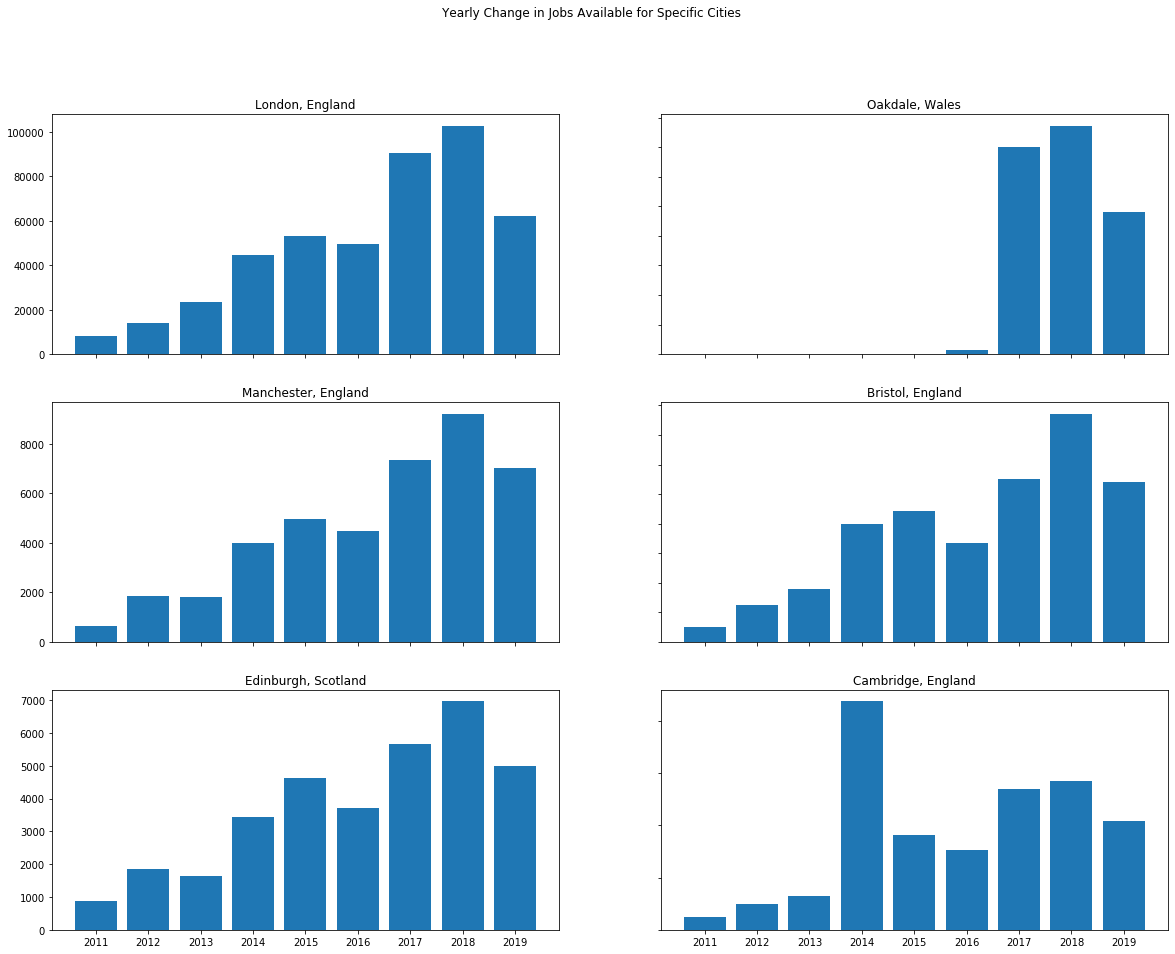

In [255]:
#plot by place
# plt.figure(figsize=(20,10))
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20,15))
fig.suptitle('Yearly Change in Jobs Available for Specific Cities')
for ax,years, jobcounts,place in zip(axs.flat, yearsList, jobcountsList2,top6):
    ax.bar(years,jobcounts)
    ax.set_title(place)

for ax in axs.flat:
    ax.label_outer()